# Bimodal Gaussian Posterior - NPE_C method

In [3]:
import lfi
import sbi
import torch
import timeit
import numpy as np

In [4]:
np.random.seed(21355)
torch.manual_seed(21)

## D=2

In [5]:
D = 2
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros((1, D))
posterior_modes = np.ones((2,D))
posterior_modes[0,:] = -3.
posterior_modes[1,:] = 3.

In [6]:
density_estimator_fun = sbi.neural_nets.posterior_nn(
    model='nsf',
    hidden_features=100,# 20, # 50,
    num_transforms=8,# 2, # 5,
    z_score_x="independent",
    z_score_theta="independent",
)

In [7]:
inference = lfi.inference.from_sbi.NPECSingleRound(
    prior=prior.return_sbi_object(),
    simulator=sim.sample_pytorch,
    observation=observation,
)

### Budget 1_000

In [8]:
simulation_budget=1_000
num_samples = 100
samples, time = inference.fit_and_sample(
    budget=simulation_budget,
    num_samples=num_samples,
    density_estimator=density_estimator_fun
)

  0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 370 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Sampling time: 39.84 seconds


/home/givasile/miniconda3/envs/lfi-dev/lib/python3.9/site-packages/nflows/transforms/lu.py:80: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2190.)
  outputs, _ = torch.triangular_solve(


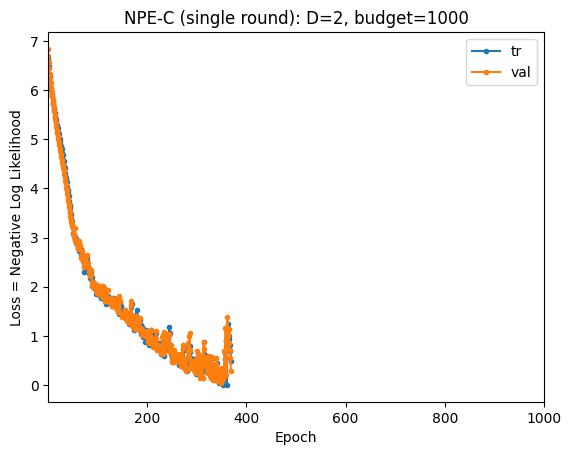

In [11]:
fig, ax = inference.plot_training_summary(budget=simulation_budget)

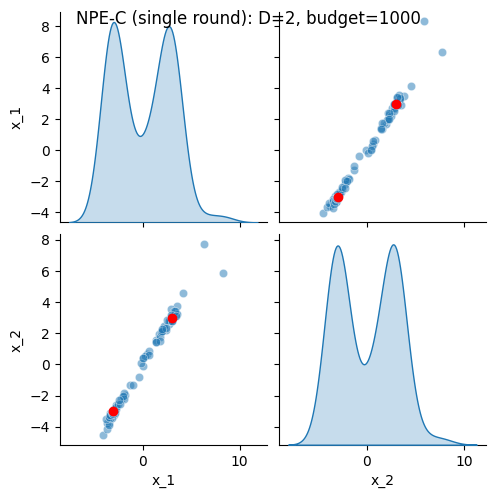

In [14]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=simulation_budget,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
    limits=torch.tensor([-10, 10.]).repeat(D, 1),
)

## D=5

In [25]:
D = 5
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros((1, D))
posterior_modes = np.ones((2, D))
posterior_modes[0, :] = -3.
posterior_modes[1, :] = 3.

In [26]:
density_estimator_fun = sbi.neural_nets.posterior_nn(
    model='nsf',
    hidden_features=100,# 20, # 50,
    num_transforms=8,# 2, # 5,
    z_score_x="independent",
    z_score_theta="independent",
)

In [27]:
inference = lfi.inference.from_sbi.NPECSingleRound(
    prior=prior.return_sbi_object(),
    simulator=sim.sample_pytorch,
    observation=observation,
)

### Budget 1_000

In [28]:
np.random.seed(21355)
torch.manual_seed(21)

In [29]:
simulation_budget = 1_000
num_samples = 100
samples, time = inference.fit_and_sample(
    budget=simulation_budget,
    num_samples=num_samples,
    density_estimator=density_estimator_fun
)

  0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 211 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Sampling time: 24.22 seconds


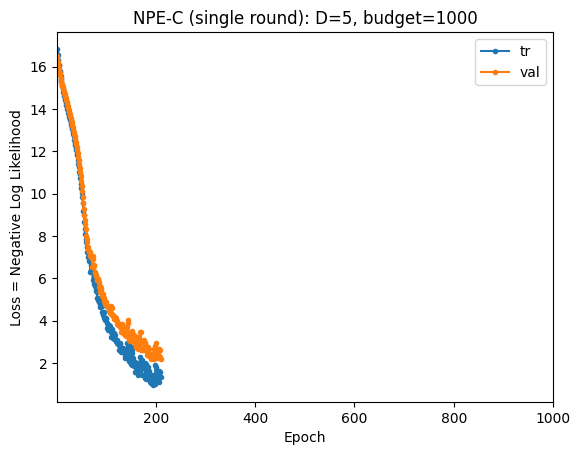

In [30]:
fig, ax = inference.plot_training_summary(budget=simulation_budget)

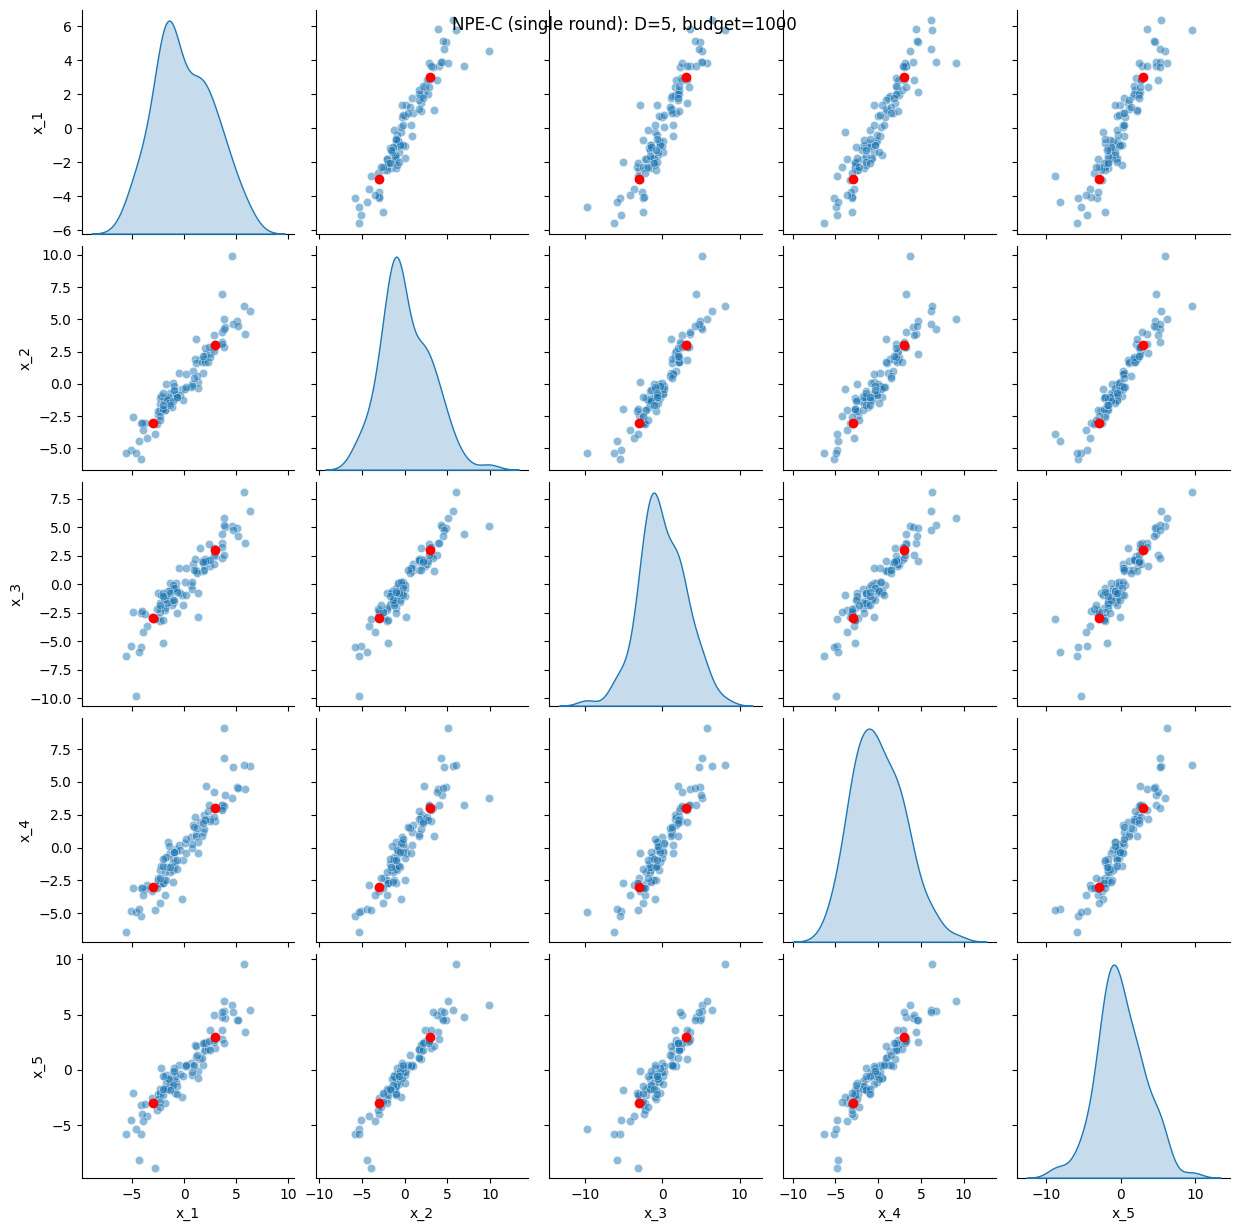

In [31]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=simulation_budget,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
    limits=torch.tensor([-10, 10.]).repeat(D, 1),
)

### Budget 5_000

In [32]:
np.random.seed(21355)
torch.manual_seed(21)

In [33]:
simulation_budget = 5_000
num_samples = 100
samples, time = inference.fit_and_sample(
    budget=simulation_budget,
    num_samples=num_samples,
    density_estimator=density_estimator_fun
)

  0%|          | 0/5000 [00:00<?, ?it/s]

 Neural network successfully converged after 158 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Sampling time: 133.23 seconds


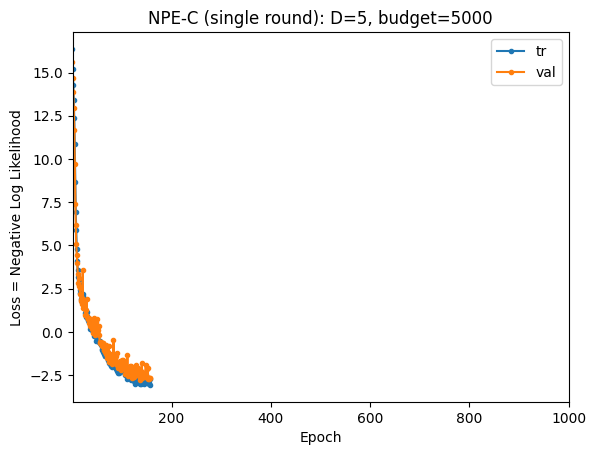

In [34]:
fig, ax = inference.plot_training_summary(budget=simulation_budget)

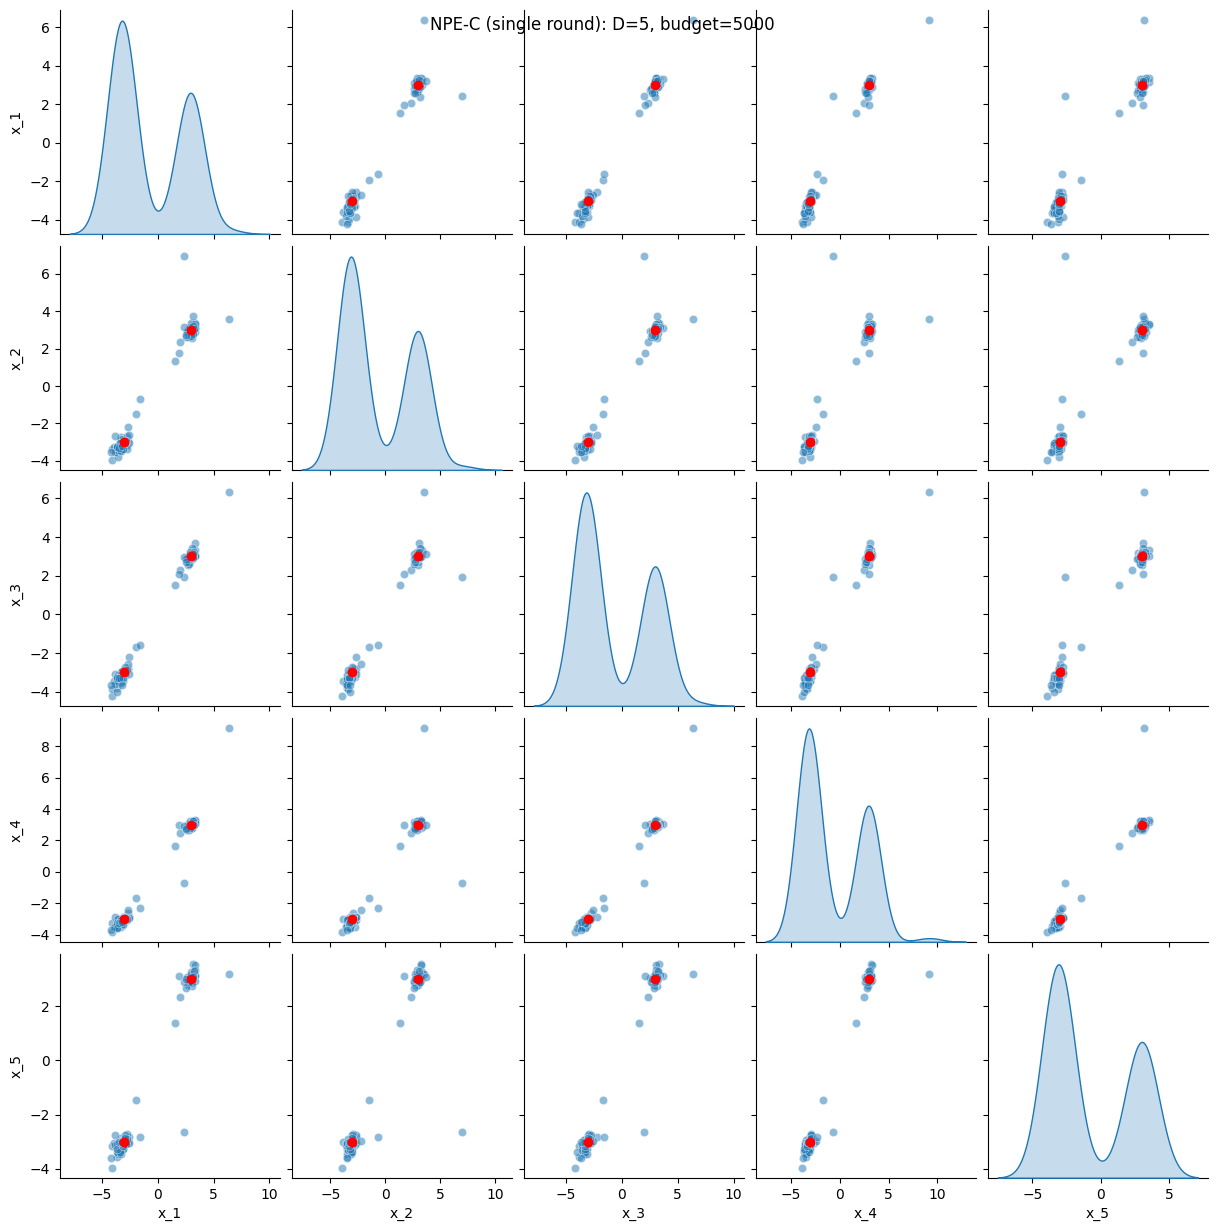

In [35]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=simulation_budget,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
    limits=torch.tensor([-10, 10.]).repeat(D, 1),
)

## D= 10

In [39]:
D = 10
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros((1, D))
posterior_modes = np.ones((2, D))
posterior_modes[0, :] = -3.
posterior_modes[1, :] = 3.

In [40]:
density_estimator_fun = sbi.neural_nets.posterior_nn(
    model='nsf',
    hidden_features=100,# 20, # 50,
    num_transforms=8,# 2, # 5,
    z_score_x="independent",
    z_score_theta="independent",
)

In [41]:
inference = lfi.inference.from_sbi.NPECSingleRound(
    prior=prior.return_sbi_object(),
    simulator=sim.sample_pytorch,
    observation=observation,
)

### Budget 5_000

In [42]:
np.random.seed(21355)
torch.manual_seed(21)

In [43]:
simulation_budget = 5_000
num_samples = 100
samples, time = inference.fit_and_sample(
    budget=simulation_budget,
    num_samples=num_samples,
    density_estimator=density_estimator_fun
)


  0%|          | 0/5000 [00:00<?, ?it/s]

 Neural network successfully converged after 124 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Sampling time: 113.86 seconds


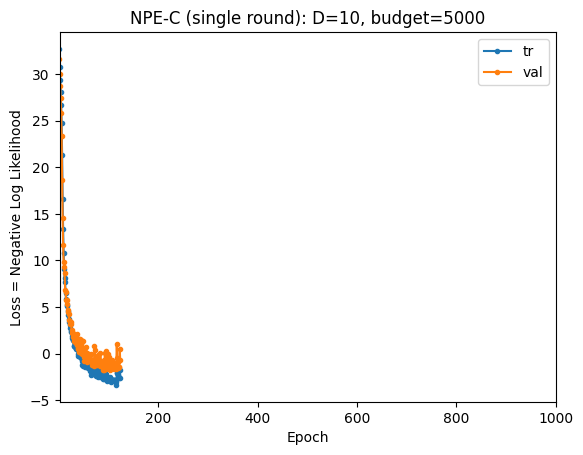

In [46]:
fig, ax = inference.plot_training_summary(budget=simulation_budget)

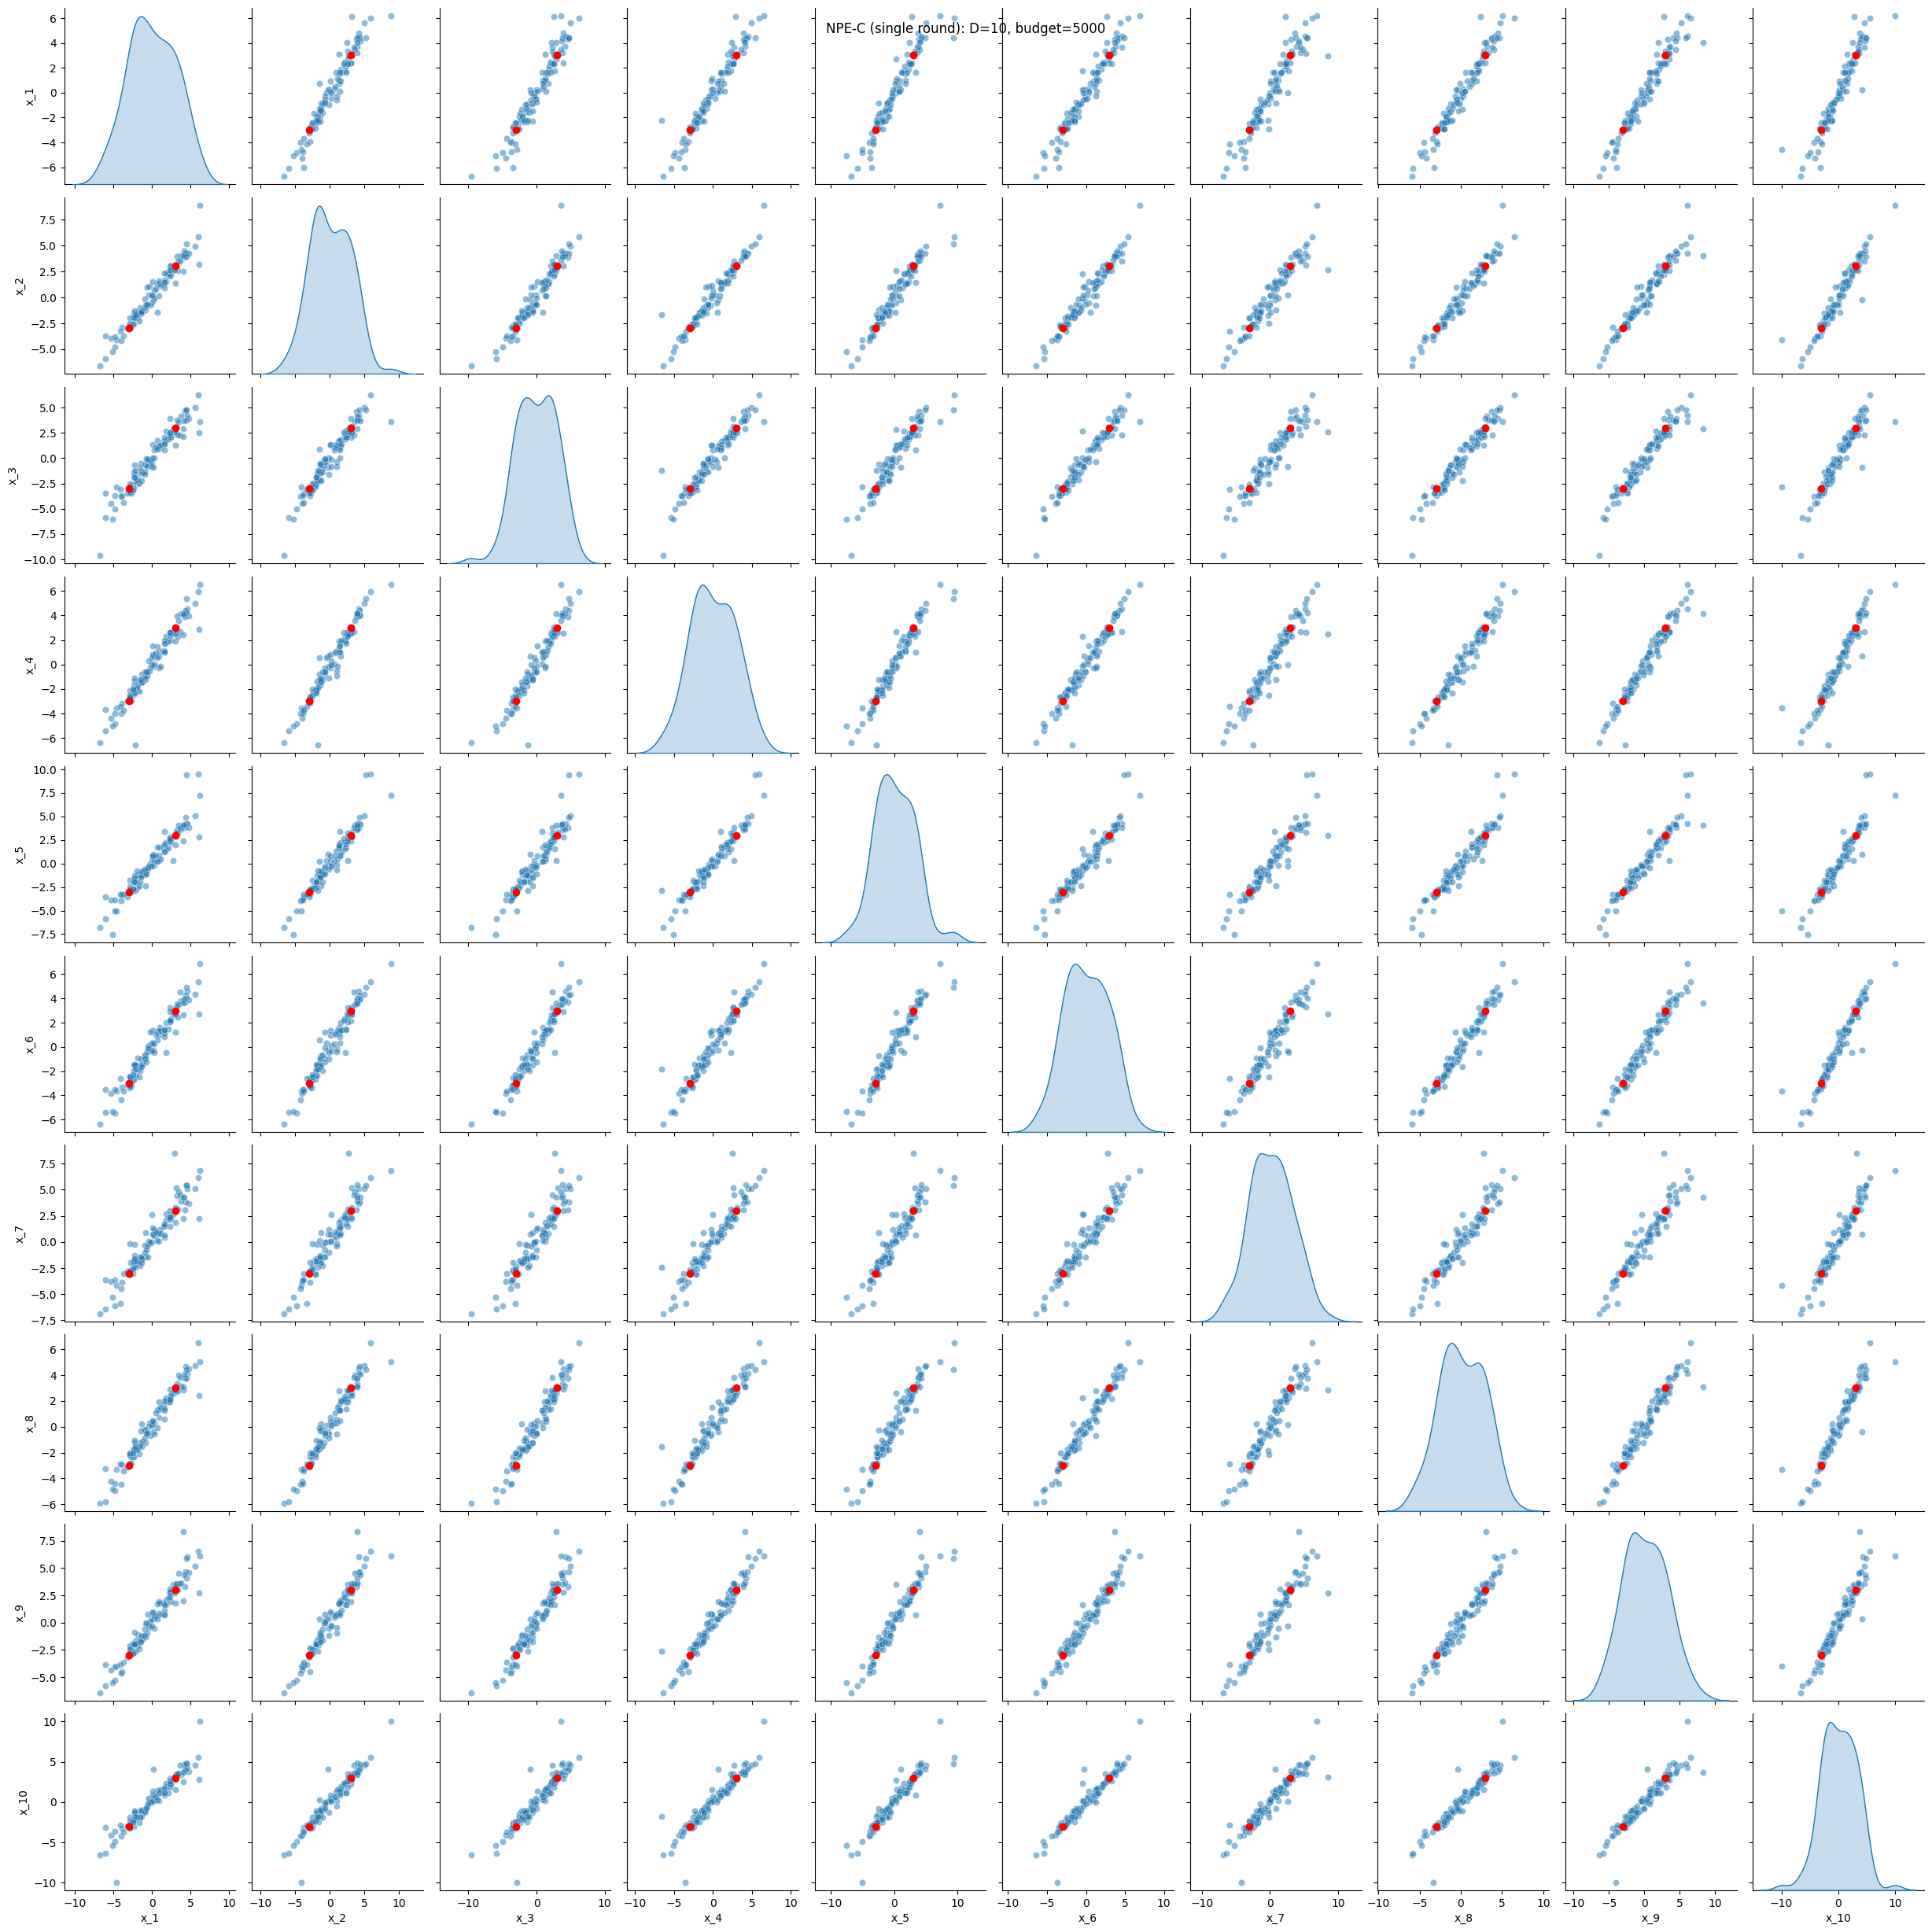

In [47]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=simulation_budget,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
    limits=torch.tensor([-10, 10.]).repeat(D, 1),
)

### Budget 10_000

In [48]:
np.random.seed(21355)
torch.manual_seed(21)

In [49]:
simulation_budget = 10_000
num_samples = 100
samples, time = inference.fit_and_sample(
    budget=simulation_budget,
    num_samples=num_samples,
    density_estimator=density_estimator_fun
)

  0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 106 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Sampling time: 196.54 seconds


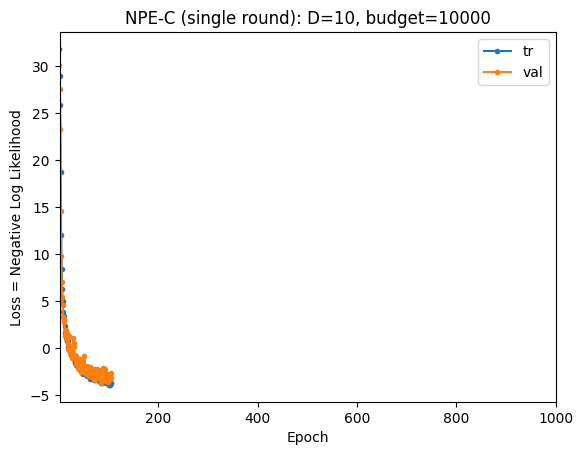

In [50]:
fig, ax = inference.plot_training_summary(budget=simulation_budget)

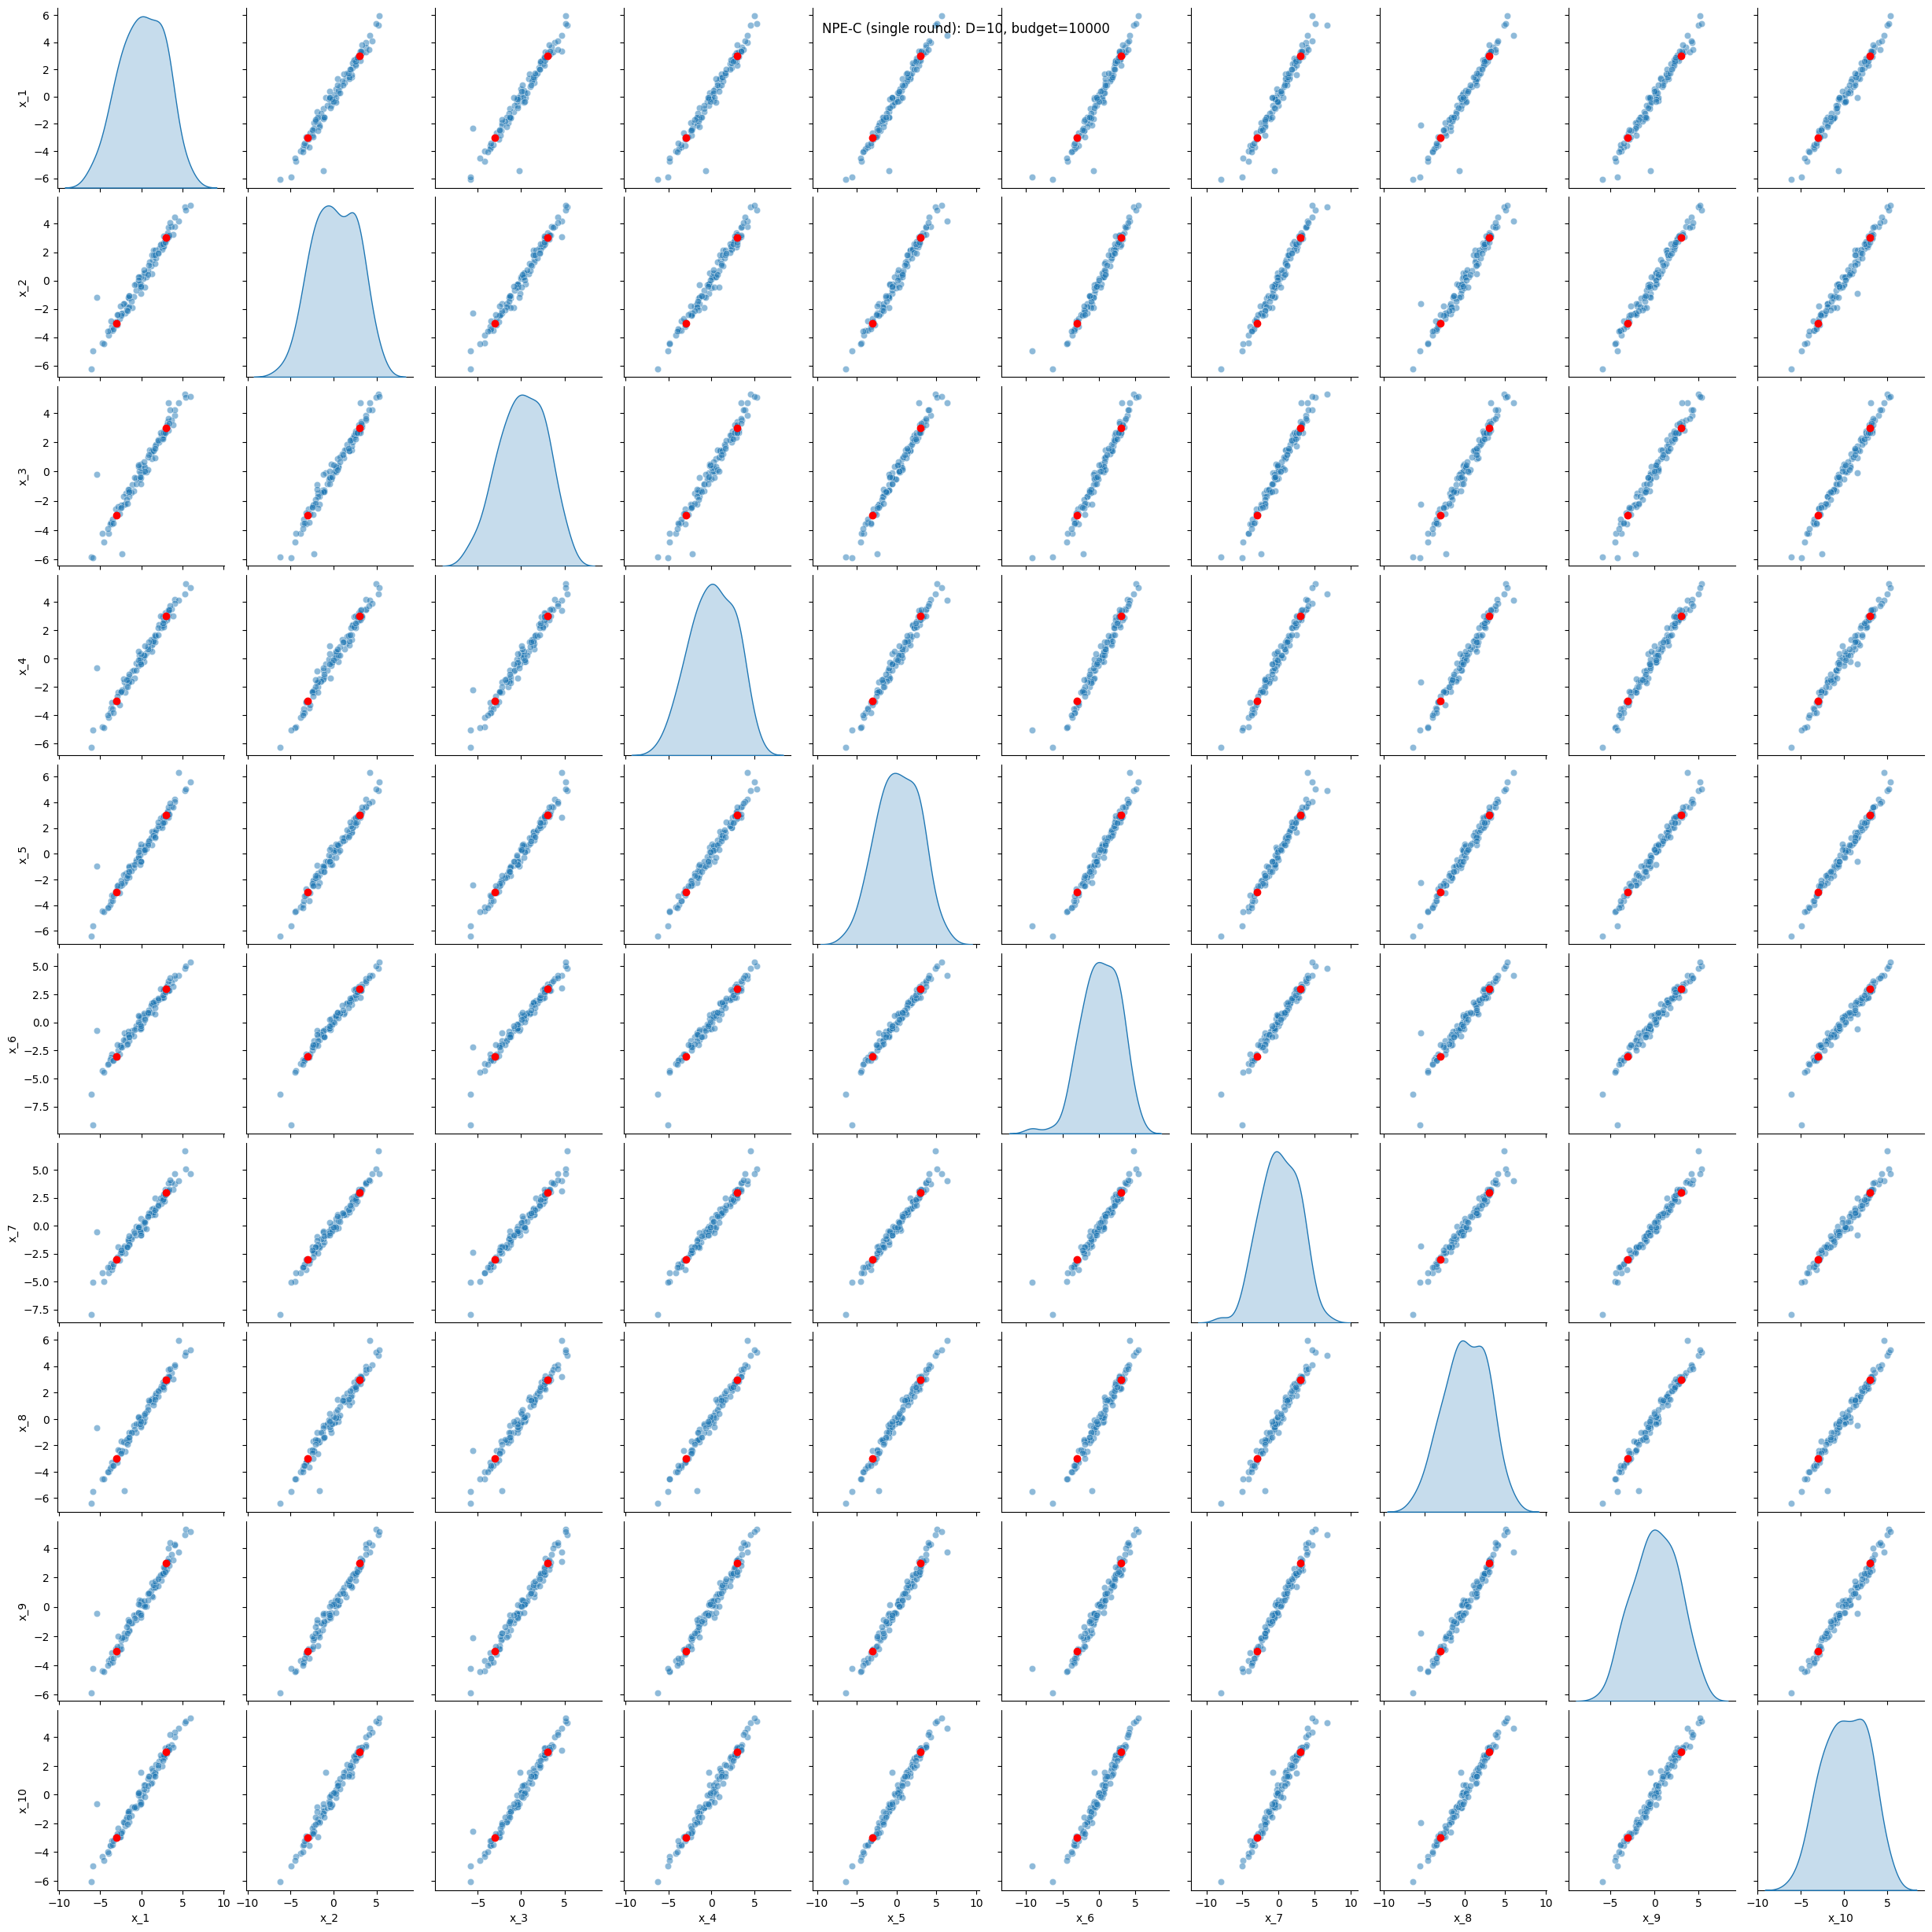

In [51]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=simulation_budget,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
    limits=torch.tensor([-10, 10.]).repeat(D, 1),
)

### Budget 20_000

In [53]:
np.random.seed(21355)
torch.manual_seed(21)

In [ ]:
simulation_budget = 20_000
num_samples = 100
samples, time = inference.fit_and_sample(
    budget=simulation_budget,
    num_samples=num_samples,
    density_estimator=density_estimator_fun
)

  0%|          | 0/20000 [00:00<?, ?it/s]

 Training neural network. Epochs trained: 144

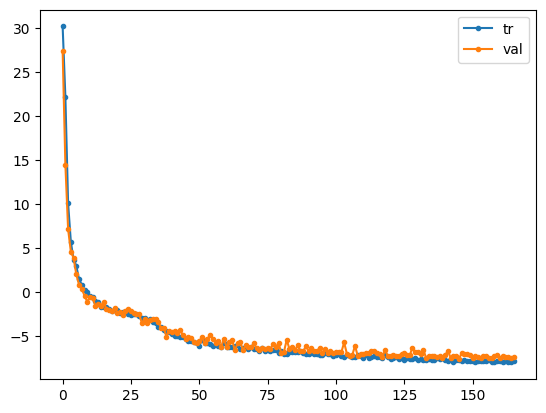

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [69]:
fig, ax = inference.plot_training_summary(budget=simulation_budget)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

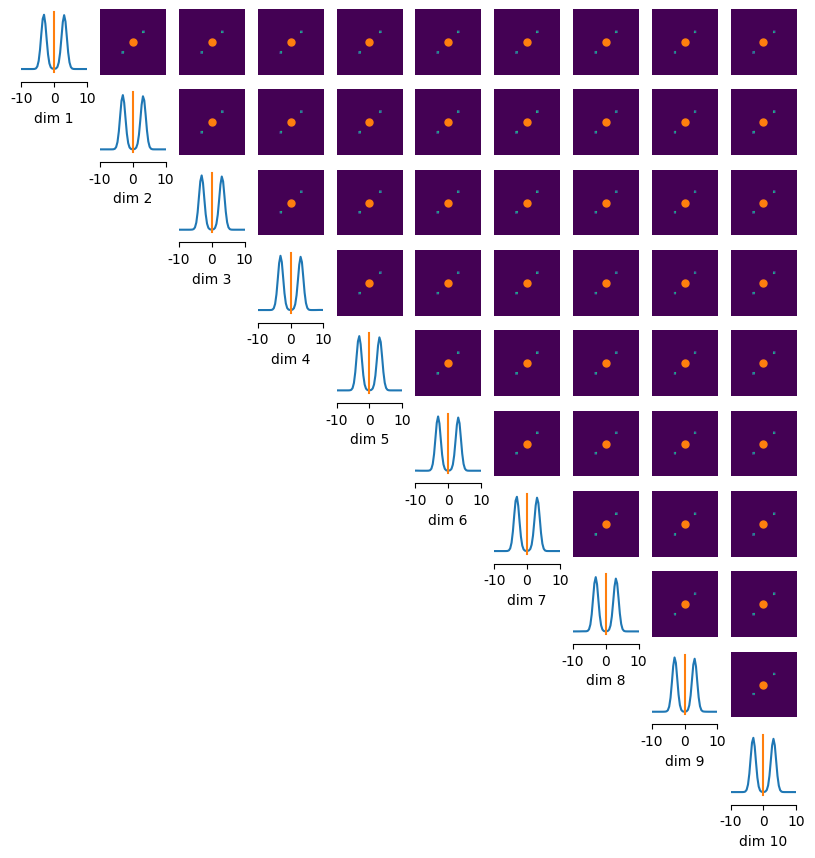

In [70]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=simulation_budget,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
    limits=torch.tensor([-10, 10.]).repeat(D, 1),
)